# Clustering 
a technique of dividing the population or data points, grouping them into different clusters on the basis of similarity and dissimilarity between them. It helps in determining the intrinsic group among the unlabeled data points.


1. Market Segmentation — helps in grouping people who have same purchasing behaviour, discover new customer segments for marketing etc
2. News — To group related news together
3. Search Engines — To group similar results
4. Social Network Analysis
5. Image Segmentation
6. Anomaly detection
7. Insurance fraud cases etc

In [2]:
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import rgb2hex
from matplotlib import colormaps as cm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
%matplotlib inline
import scipy.cluster.hierarchy as ch
from scipy.stats import pearsonr
# Set style and Color
cmap2 = cm.get_cmap('twilight')
colors1= []
for i in range(cmap2.N):
    rgb= cmap2(i)[:4]
    colors1.append(rgb2hex(rgb))
    #print(rgb2hex(rgb))
# Set style
sns.set(style='whitegrid')

In [3]:
df = pd.read_csv('./Customer-Segmentation-Project/Customer Data.csv',low_memory = False)
#Display Customer Data 
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# Get more information about your data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
# No of rows and Columns in the data
df.shape

(200, 5)

In [6]:
# Statistical Analysis of customer data 
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
# Missing Values
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
# Unique Values from Gender Column
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [9]:
# Count of each gender 
df.Gender.value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

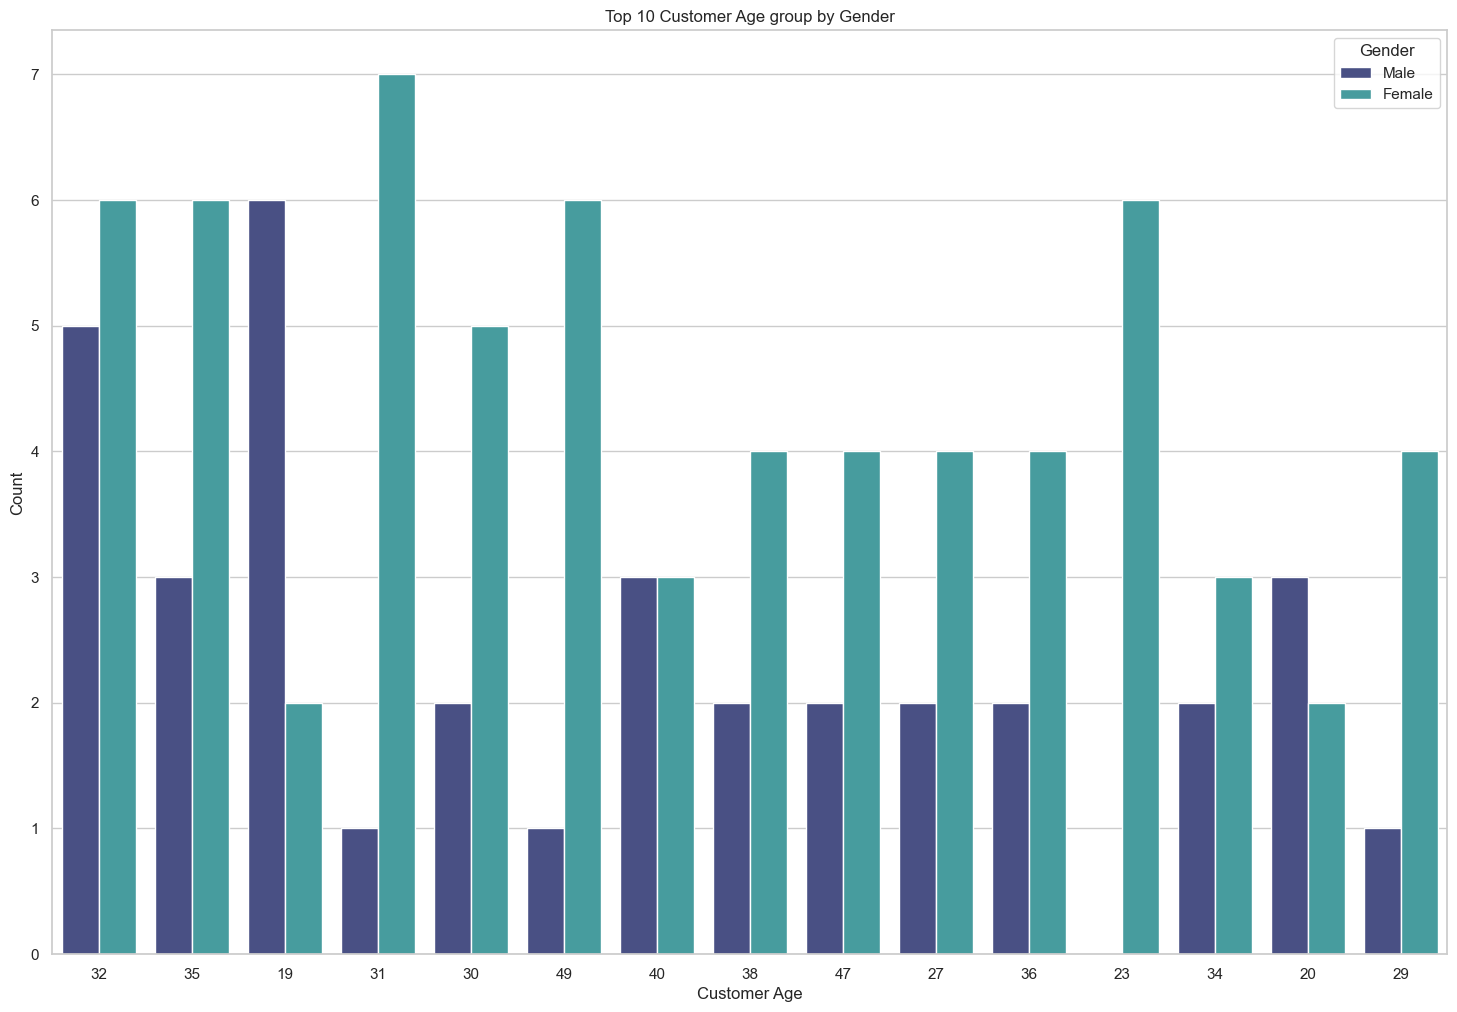

In [10]:
# Top 10 Customer's Age by Gender with most spending
plt.figure(figsize=(18,12))
sns.countplot(x='Age',data=df,palette='mako',order=df['Age'].value_counts().index[0:15],hue='Gender')
plt.xlabel('Customer Age')
plt.ylabel('Count')
plt.title("Top 10 Customer Age group by Gender")

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


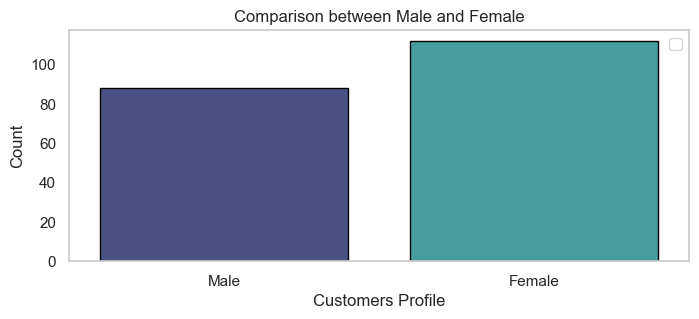

In [11]:
# Comparison between Male and Female
plt.figure(figsize=(8,3))
sns.countplot(x='Gender',data=df,palette='mako',linewidth=1,edgecolor='black')
plt.xlabel('Customers Profile')
plt.ylabel('Count')
plt.title('Comparison between Male and Female')
plt.grid(False)
plt.legend()
plt.show()

<Figure size 4400x4000 with 0 Axes>

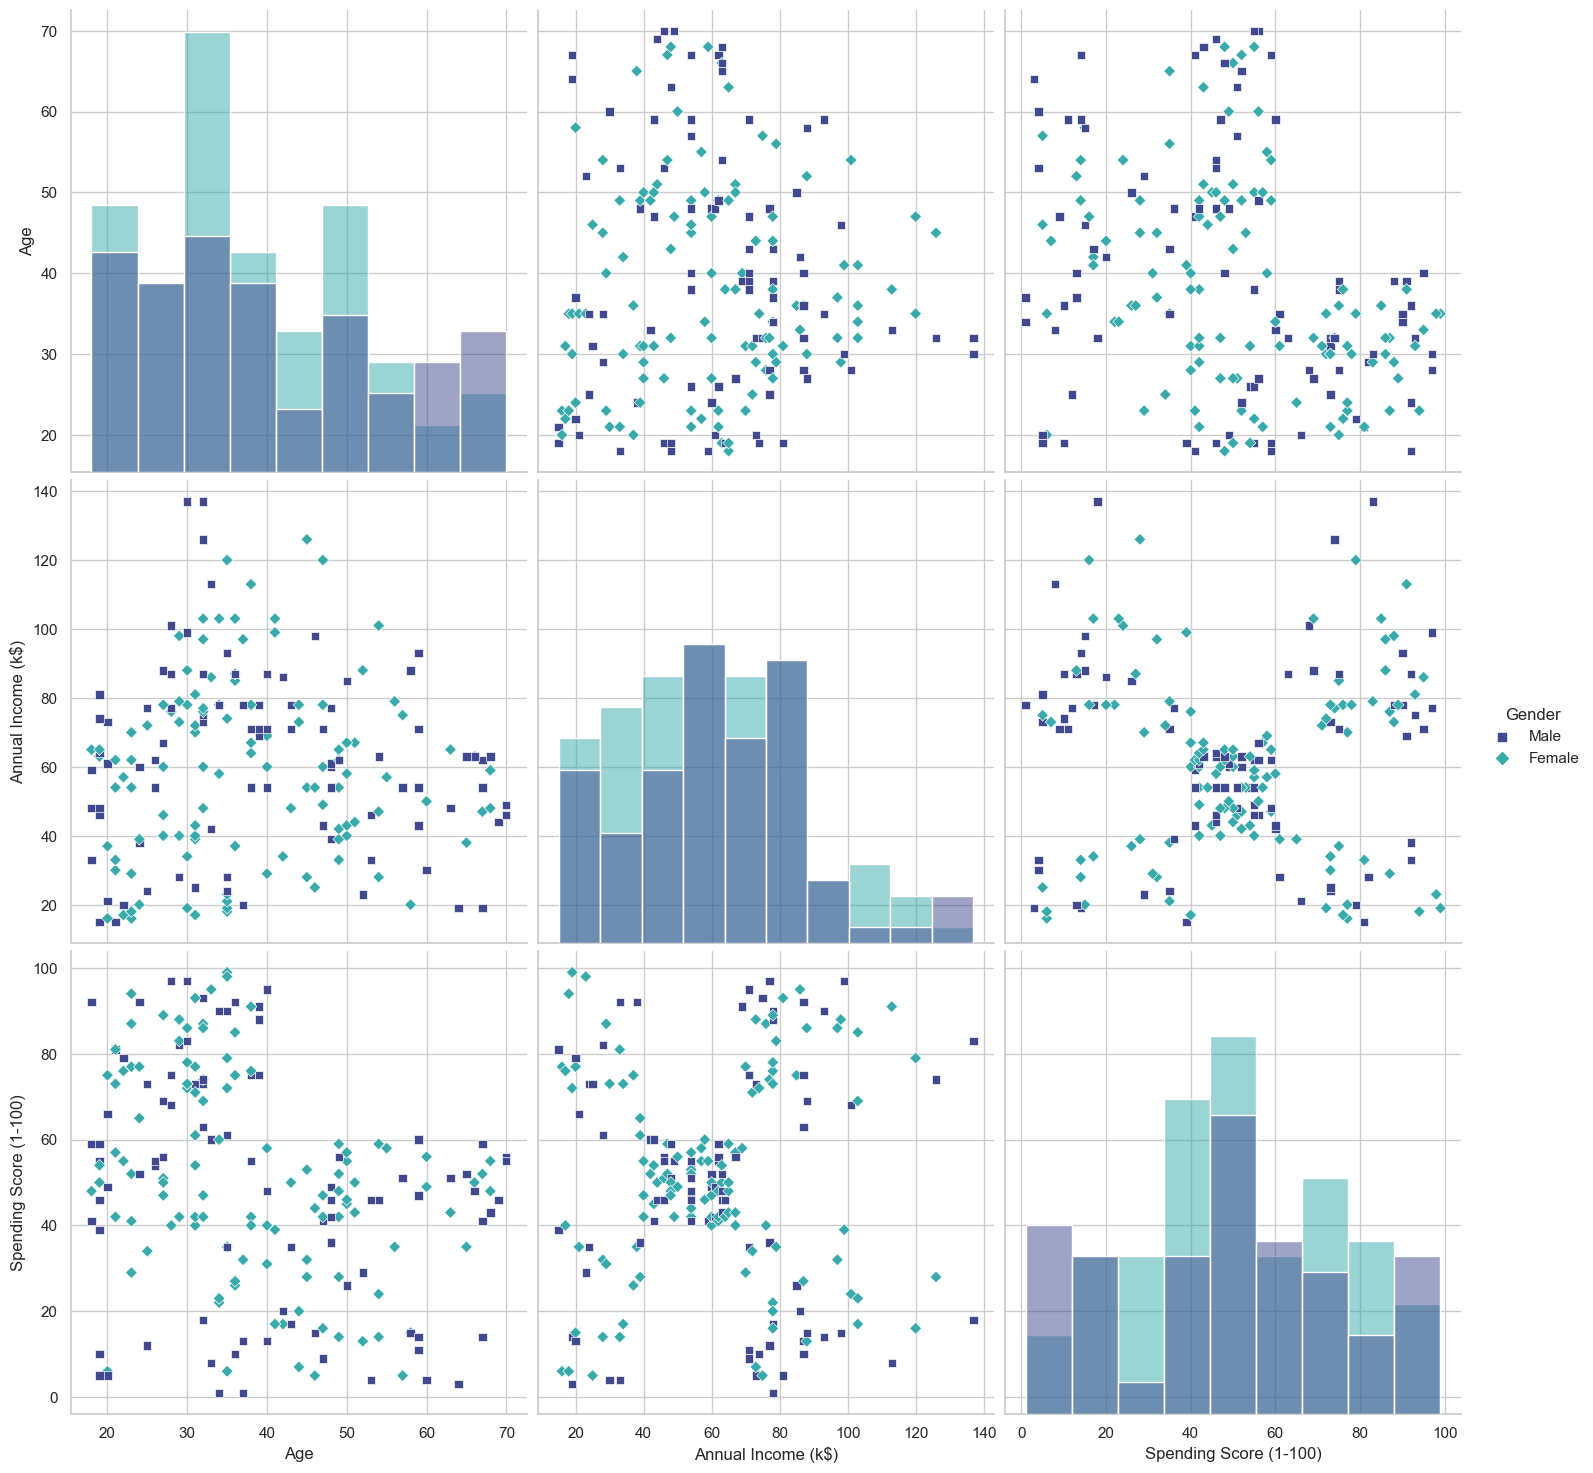

In [12]:
# Detailed Analysis ( pairplot - hist)
plt.figure(figsize=(22,20),dpi=200)
sns.pairplot(df.drop('CustomerID',axis=1),hue='Gender',palette='mako',diag_kind="hist",markers=["s", "D"],height=5)


plt.show()

<Figure size 4400x4000 with 0 Axes>

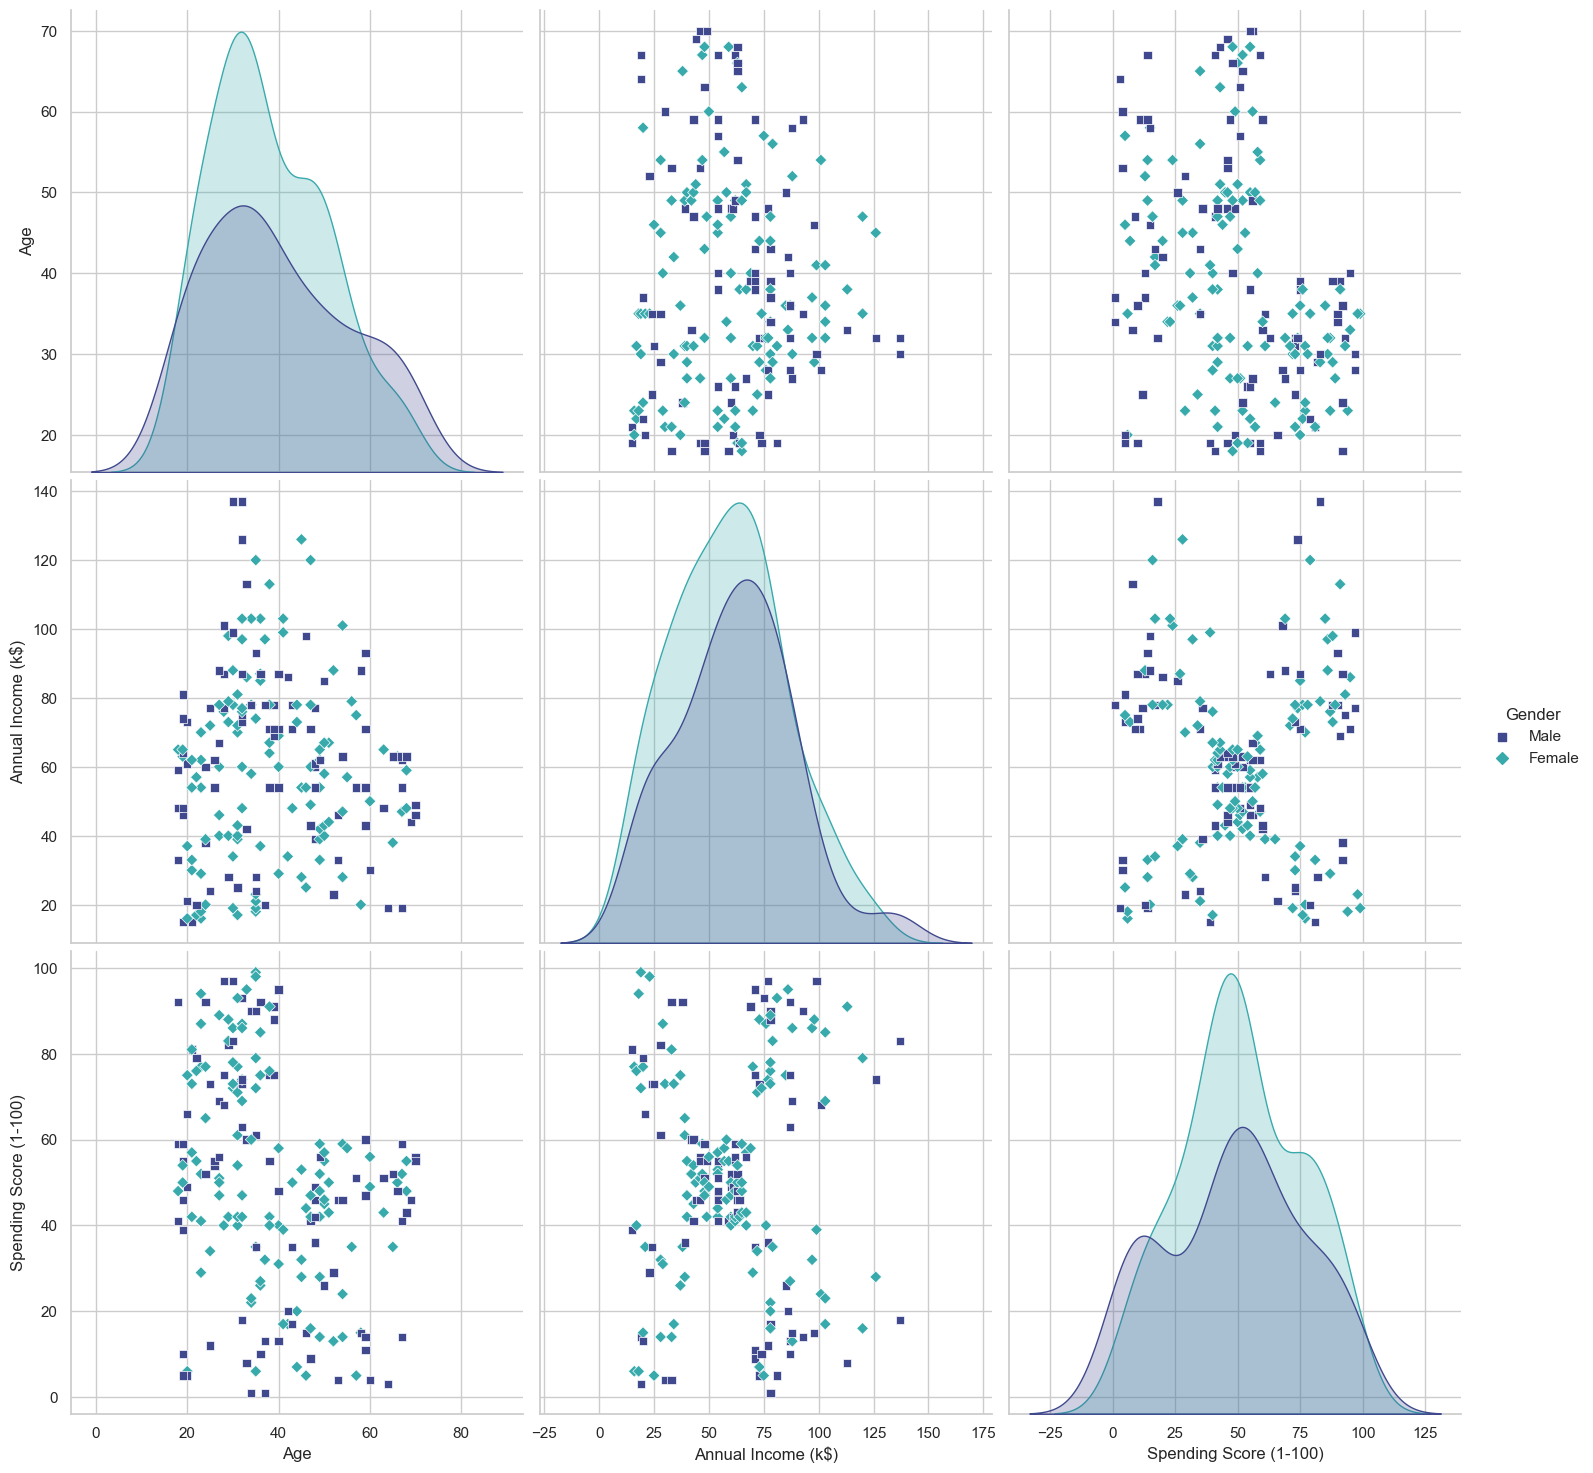

In [13]:
# Detailed Analysis ( kde)
plt.figure(figsize=(22,20),dpi=200)
sns.pairplot(df.drop('CustomerID',axis=1),hue='Gender',palette='mako',diag_kind="kde",markers=["s", "D"],height=5)

plt.show()

<Figure size 4400x4000 with 0 Axes>

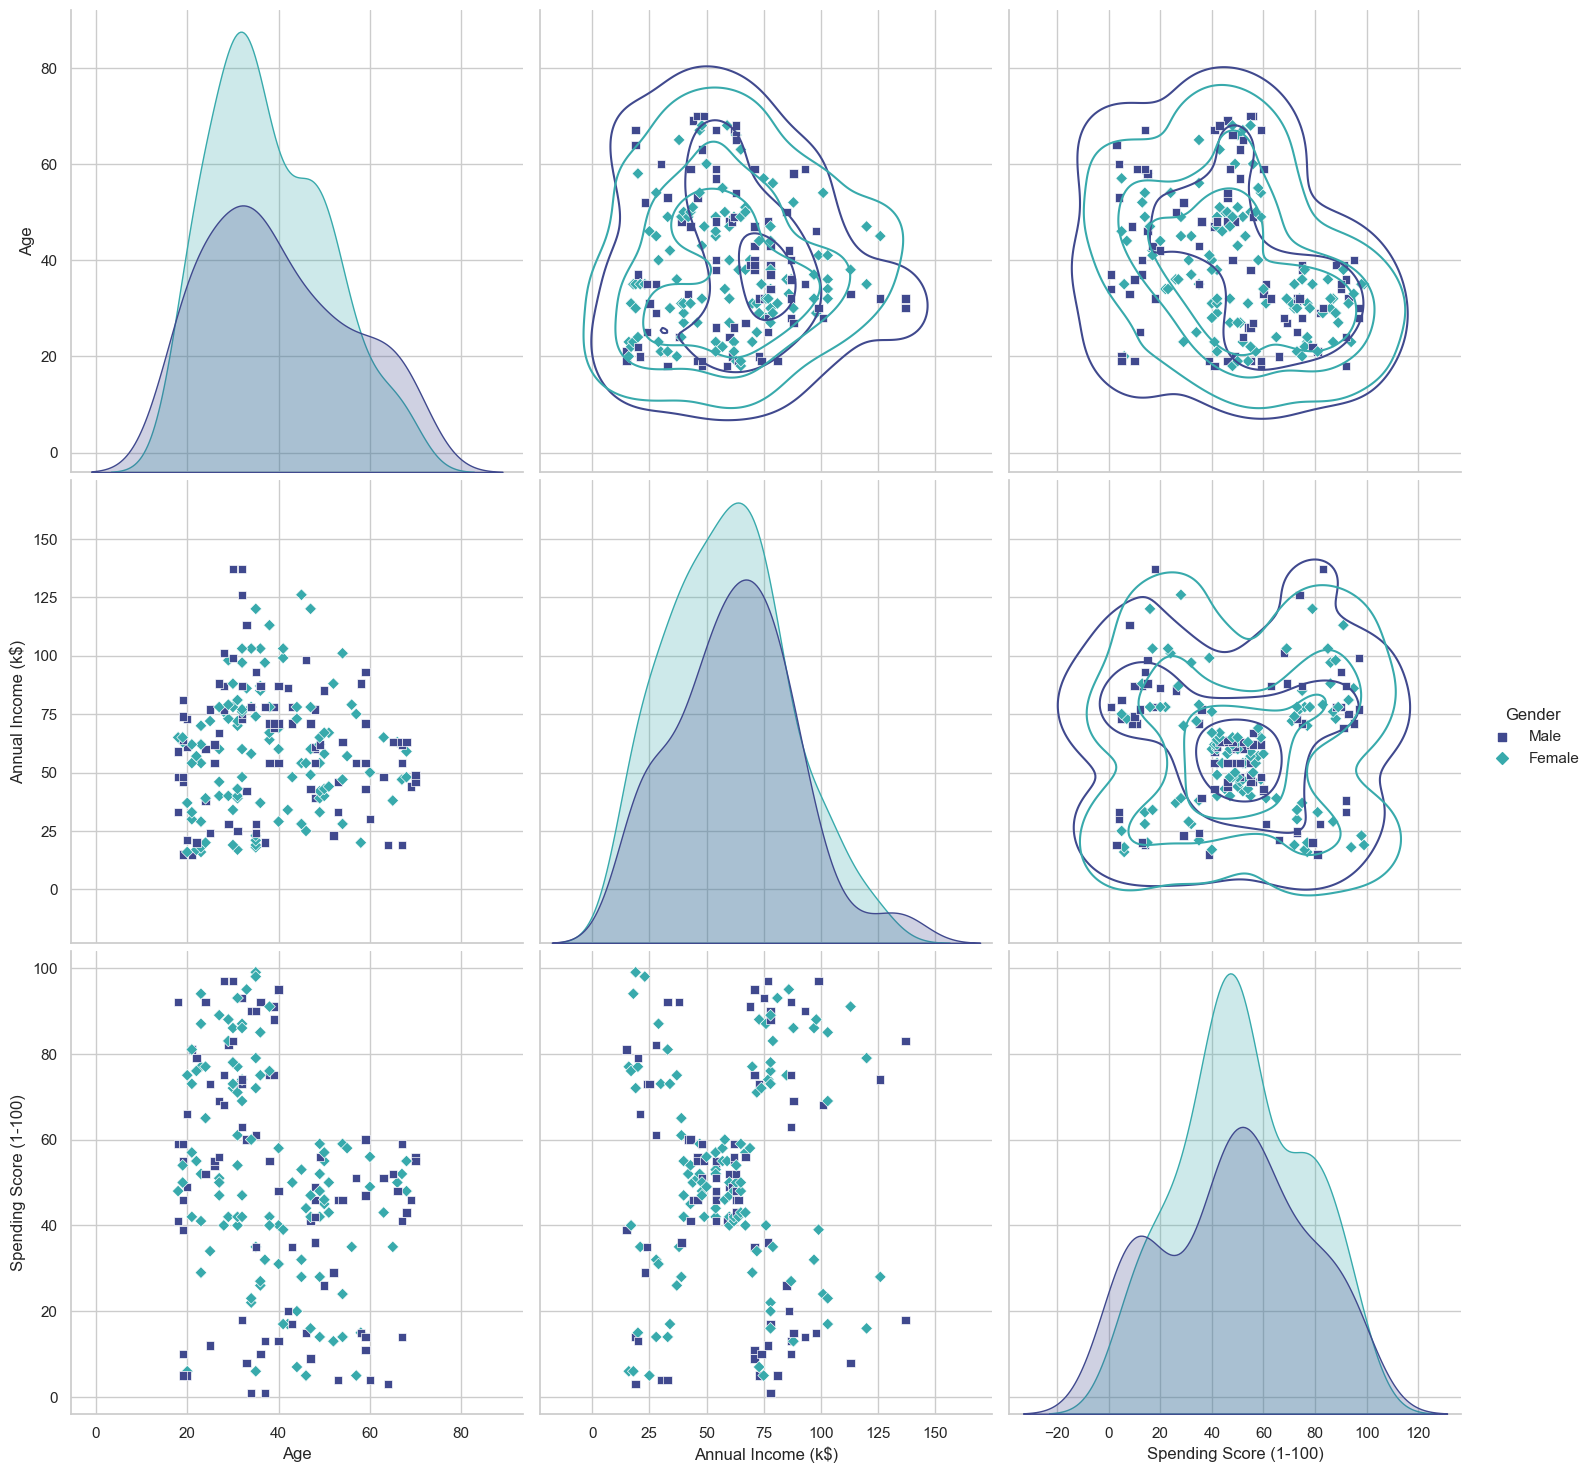

In [14]:
# Detailed Analysis ( KDE )
plt.figure(figsize=(22,20),dpi=200)
g=sns.pairplot(df.drop('CustomerID',axis=1),hue='Gender',palette='mako',diag_kind="kde",markers=["s", "D"],height=5)
g.map_upper(sns.kdeplot, levels=4, color=".2")

plt.show()

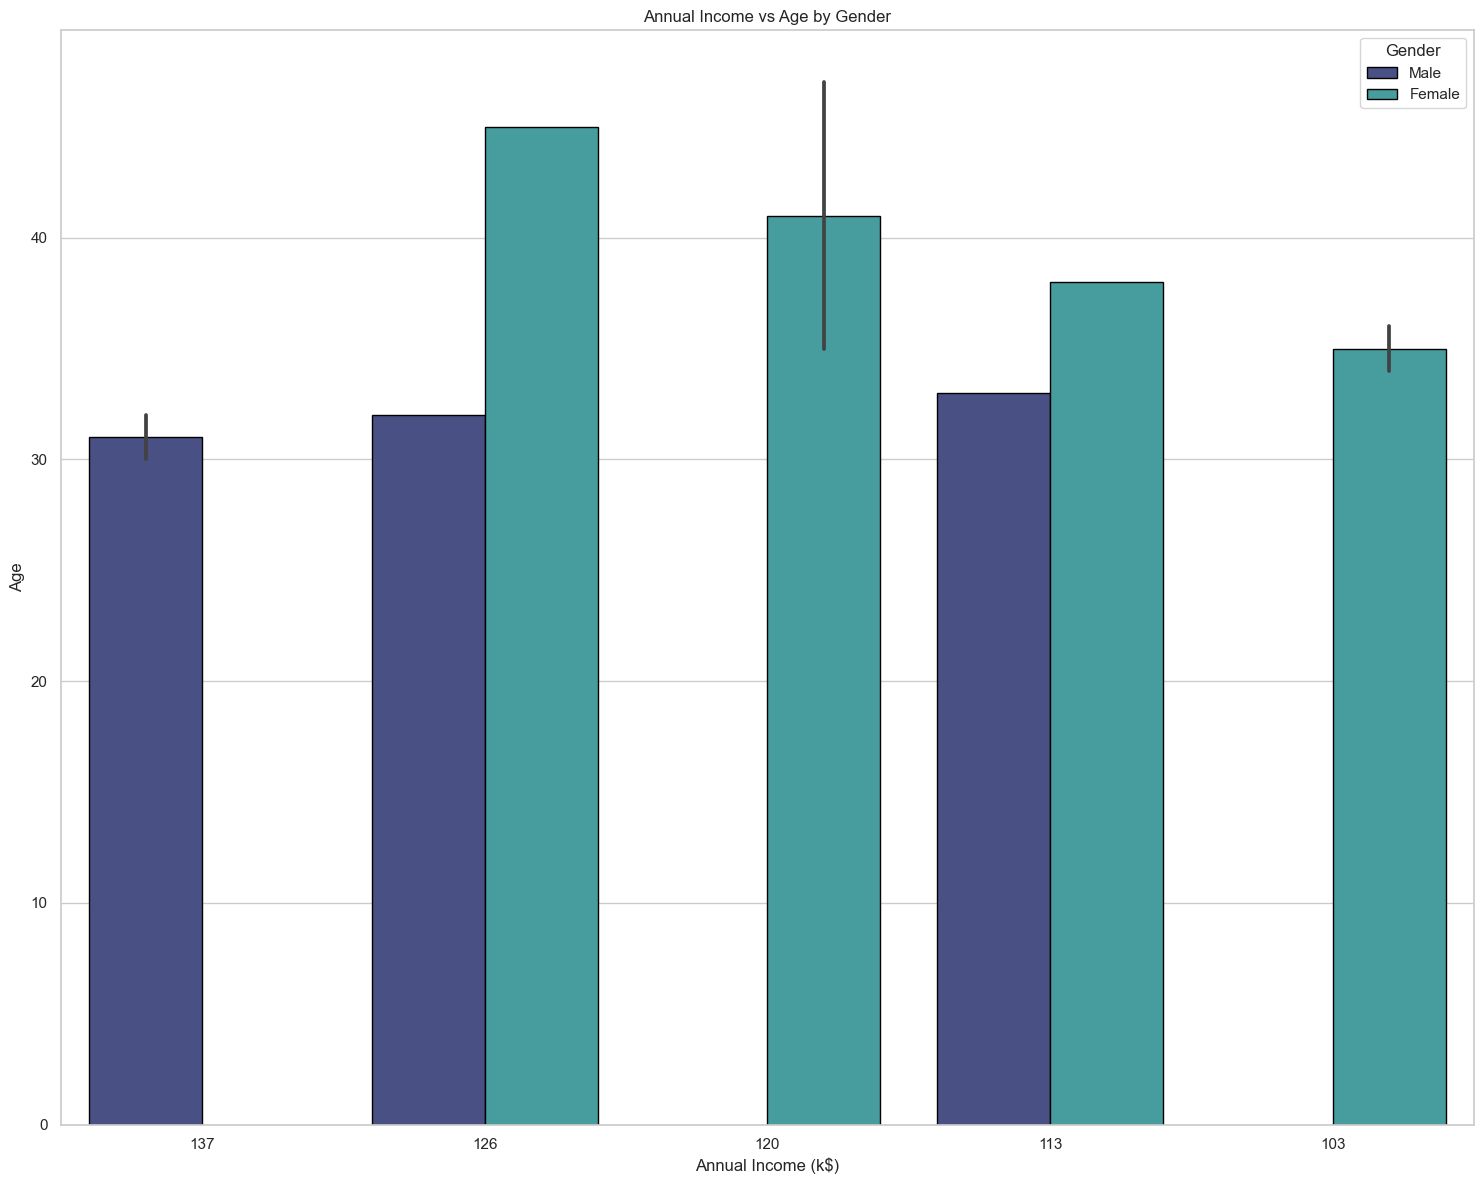

In [15]:
# Annual Income vs Age by Gender
c_df=df.sort_values('Annual Income (k$)',ascending = False).head(10)
plt.figure(figsize=(15,12))
sns.barplot(x='Annual Income (k$)',y='Age',data=c_df, order=c_df['Annual Income (k$)'].value_counts().index,hue='Gender',edgecolor='black',palette='mako')
plt.title('Annual Income vs Age by Gender')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Age')
plt.tight_layout()
plt.show()

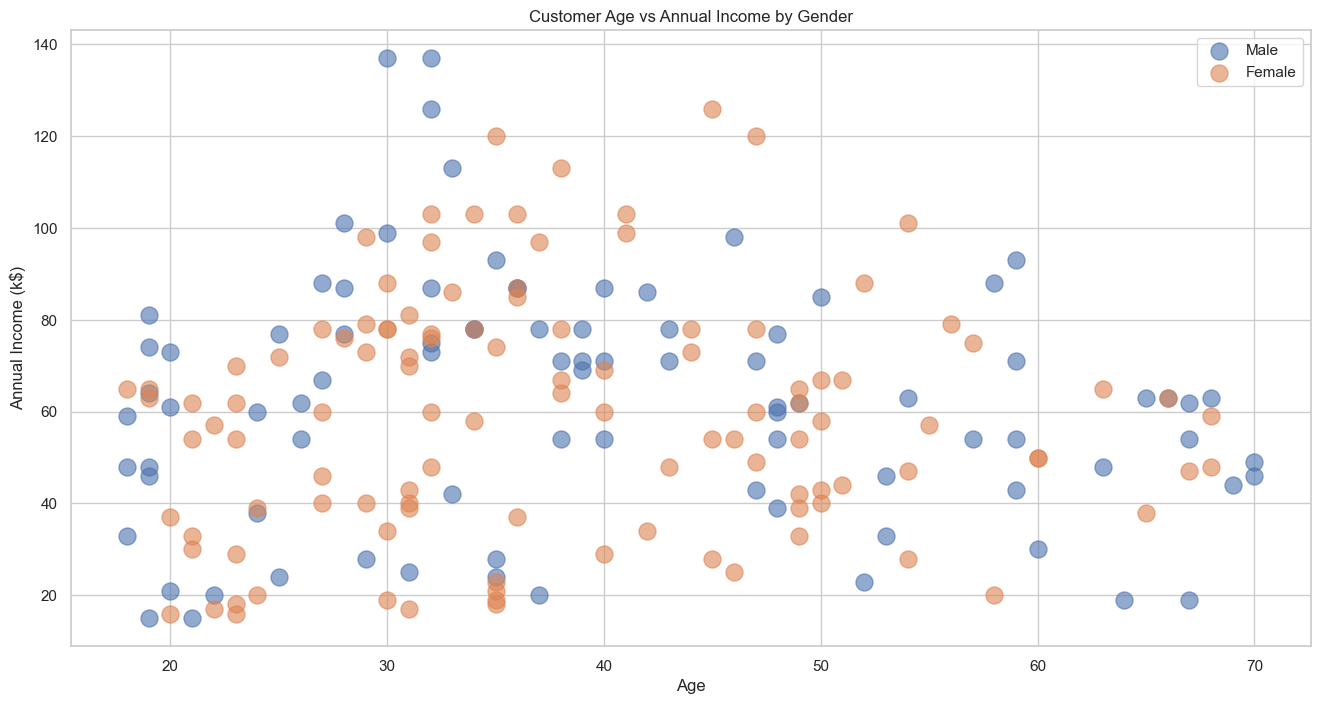

In [16]:
# Comparison Age vs Annual Income by Gender
plt.figure(figsize=(16,8))
for gender in ['Male','Female']:
    plt.scatter(x='Age',y='Annual Income (k$)',data=df[df['Gender'] == gender],label=gender,s=150,alpha=0.6)
    
plt.xlabel('Age'),plt.ylabel('Annual Income (k$)')
plt.title('Customer Age vs Annual Income by Gender')
plt.legend()

plt.show()

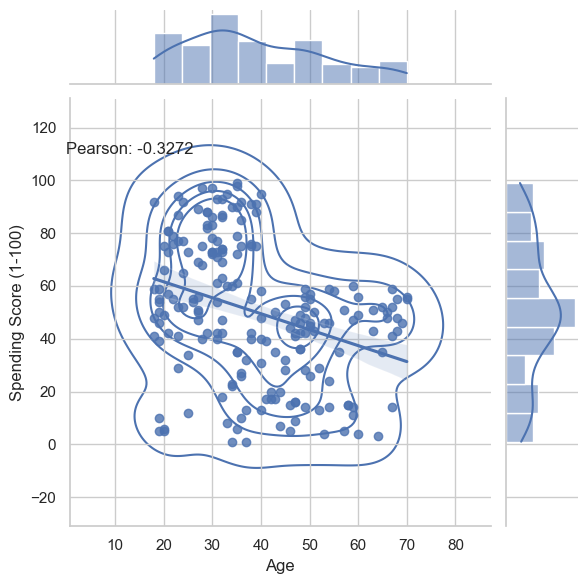

In [18]:
# Pearson's correlation between Age and Spending Score
corr, _ = pearsonr(df['Age'], df['Spending Score (1-100)'])
t = (sns.jointplot(x='Age', y='Spending Score (1-100)', data=df,
                    kind='reg',palette='mako')).plot_joint(sns.kdeplot, zorder=0, n_levels=6)
plt.text(0,110, 'Pearson: {:.4f}'.format(corr))

plt.show()

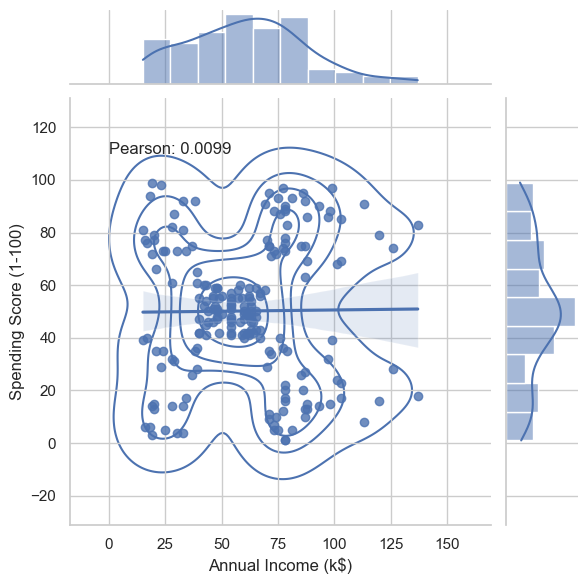

In [20]:
# Pearson's correlation between Annual Income and Spending Score
corr, _ = pearsonr(df['Annual Income (k$)'], df['Spending Score (1-100)'])
t = (sns.jointplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df,
                    kind='reg',palette='mako')).plot_joint(sns.kdeplot, zorder=0, n_levels=6)
plt.text(0,110, 'Pearson: {:.4f}'.format(corr))

plt.show()


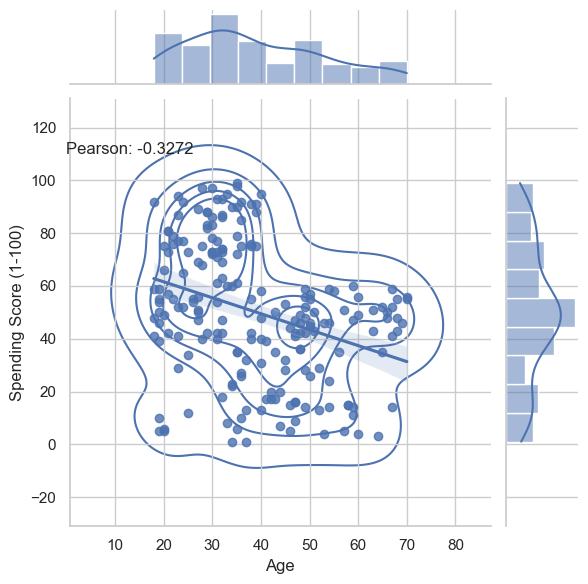

In [21]:
# Pearson's correlation between Annual Income and Age
corr, _ = pearsonr(df['Age'], df['Spending Score (1-100)'])
t = (sns.jointplot(x='Age', y='Spending Score (1-100)', data=df,
                    kind='reg',palette='mako')).plot_joint(sns.kdeplot, zorder=0, n_levels=6)
plt.text(0,110, 'Pearson: {:.4f}'.format(corr))

plt.show()

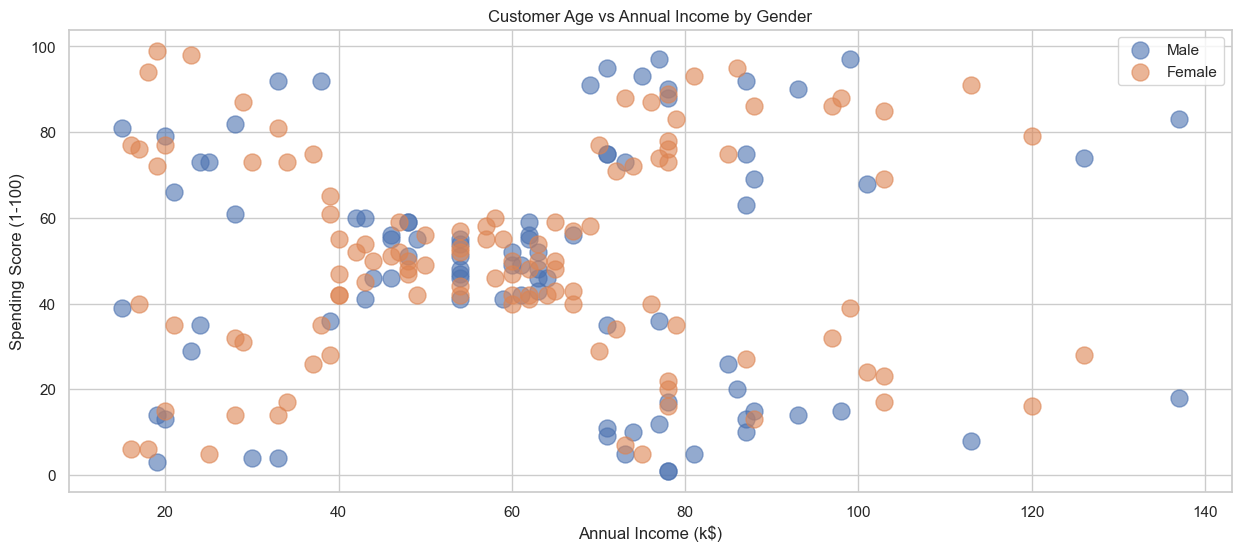

In [22]:
# Comparison Annual Income vs Spending Score (1-100) by Gender
plt.figure(figsize=(15,6))
for gender in ['Male','Female']:
    plt.scatter(x='Annual Income (k$)',y='Spending Score (1-100)',data=df[df['Gender'] == gender],label=gender,s=150,alpha=0.6)
    
plt.xlabel('Annual Income (k$)'),plt.ylabel('Spending Score (1-100)')
plt.title('Customer Age vs Annual Income by Gender')
plt.legend()

plt.show()

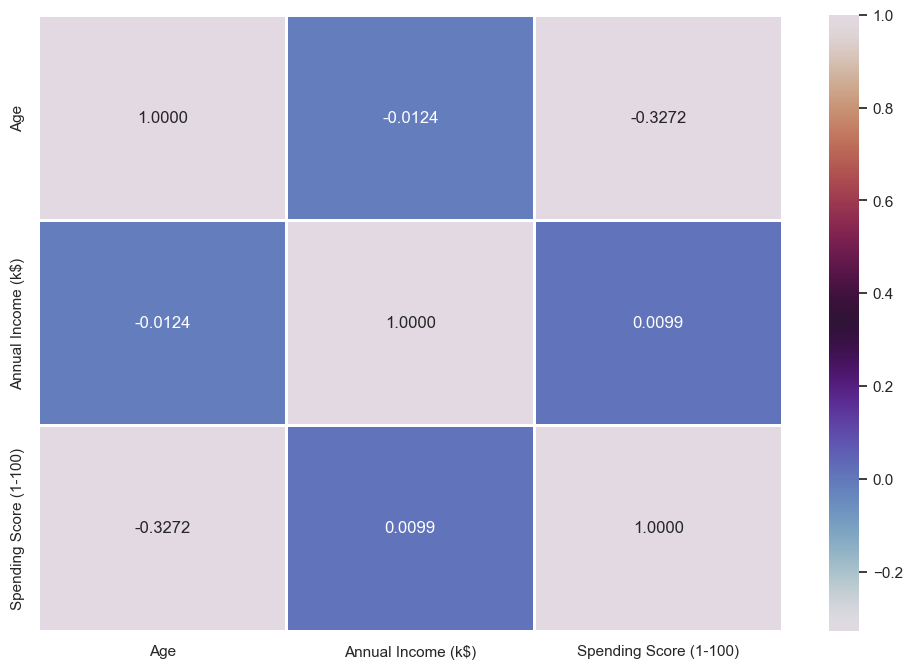

In [24]:
# Heatmap to see correlation
plt.figure(figsize=(12,8))
sns.heatmap(df.drop('CustomerID',axis=1).corr(numeric_only=True),annot=True,cmap=colors1,fmt='.4f',linewidth=2)
plt.show()

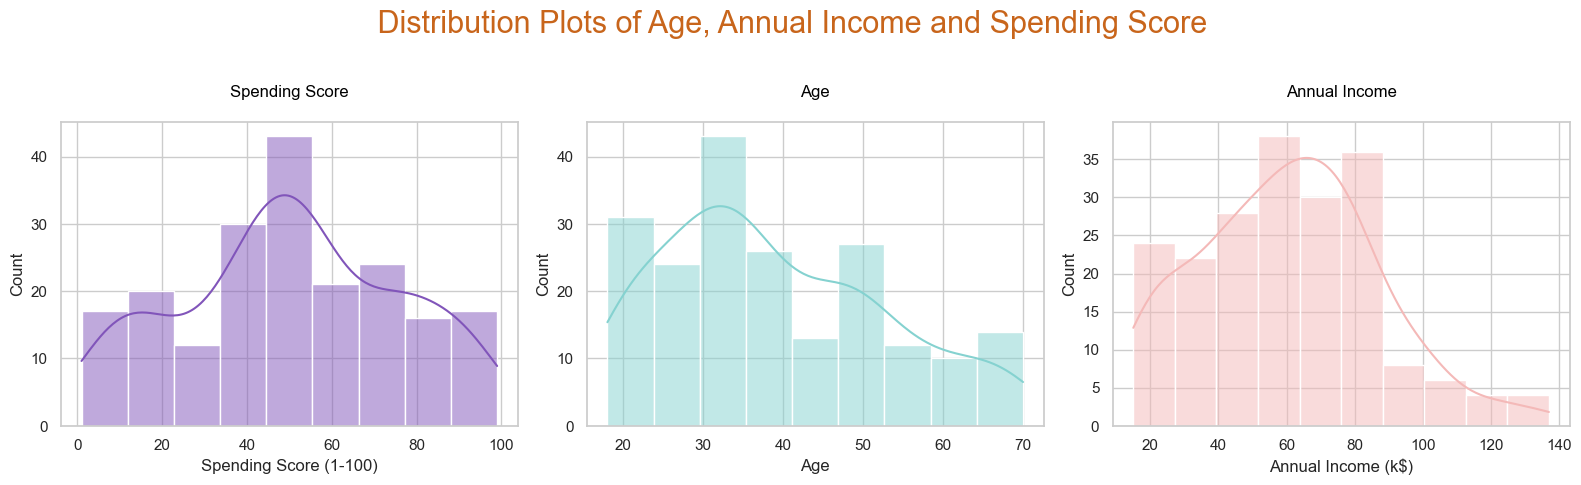

In [31]:
# Distribution Plots
from matplotlib import axes


plt.figure(figsize=(16,12))
# Spending Score
plt.subplot(3,3,1)
plt.title('Spending Score\n', color='black')
sns.histplot(df['Spending Score (1-100)'], kde=True, color='#8155BA')

# Annual Income 
plt.subplot(3,3,3)
plt.title('Annual Income\n', color='black')
sns.histplot(df['Annual Income (k$)'], kde=True, color='#F4B9B8')
# Age
plt.subplot(3,3,2)
plt.title('Age\n', color='black')
sns.histplot(df['Age'], kde=True, color='#85D2D0')
plt.suptitle(' Distribution Plots of Age, Annual Income and Spending Score \n', color='#C8651B', size = 22)
plt.tight_layout()

plt.show()

In [32]:
# Label Encoding : To covert categorical variable to Numeric Variable
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
df['Gender'] = l.fit_transform(df.iloc[:,0])
# Standardization 
x = df.iloc[:,0:].values 
sc = StandardScaler()
X = sc.fit_transform(x)
# Principal Component Analysis 
pca = PCA(n_components = 2) 
X_pca = pca.fit_transform(X)

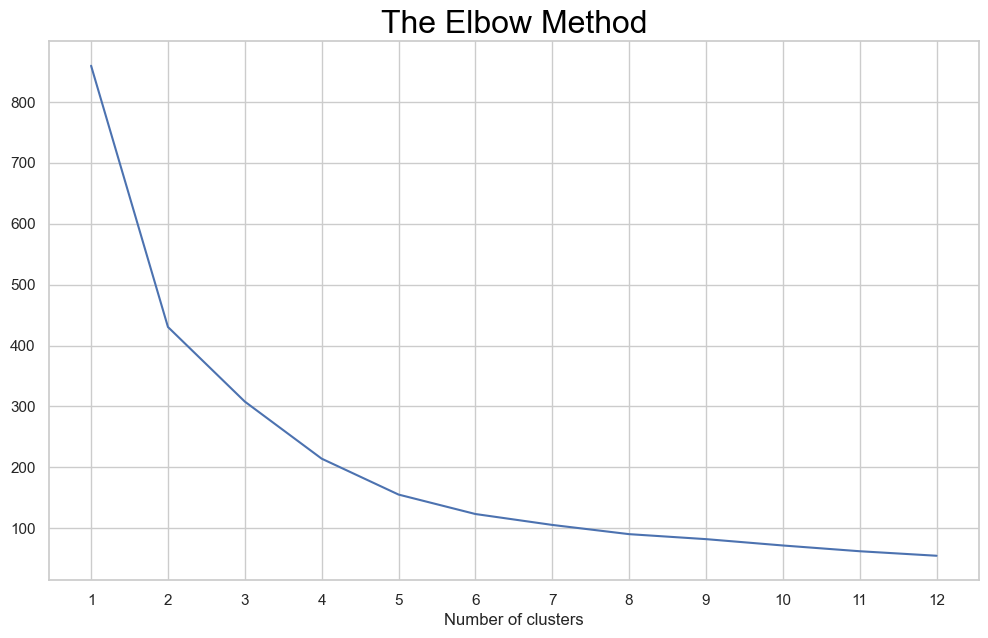

In [34]:
# Find the optimum number for the cluster
from sklearn.cluster import KMeans
l1 = []
for i in range(1,13):
    k_c = KMeans(n_clusters = i, init ='k-means++', random_state=42,n_init=10)
    k_c.fit(X_pca)
    l1.append(k_c.inertia_)
plt.figure(figsize=(12,7))
plt.plot(range(1, 13), l1)
plt.title('The Elbow Method', color='black',fontsize='23')
plt.xlabel('Number of clusters')
plt.xticks(np.arange(1,13))

plt.show()

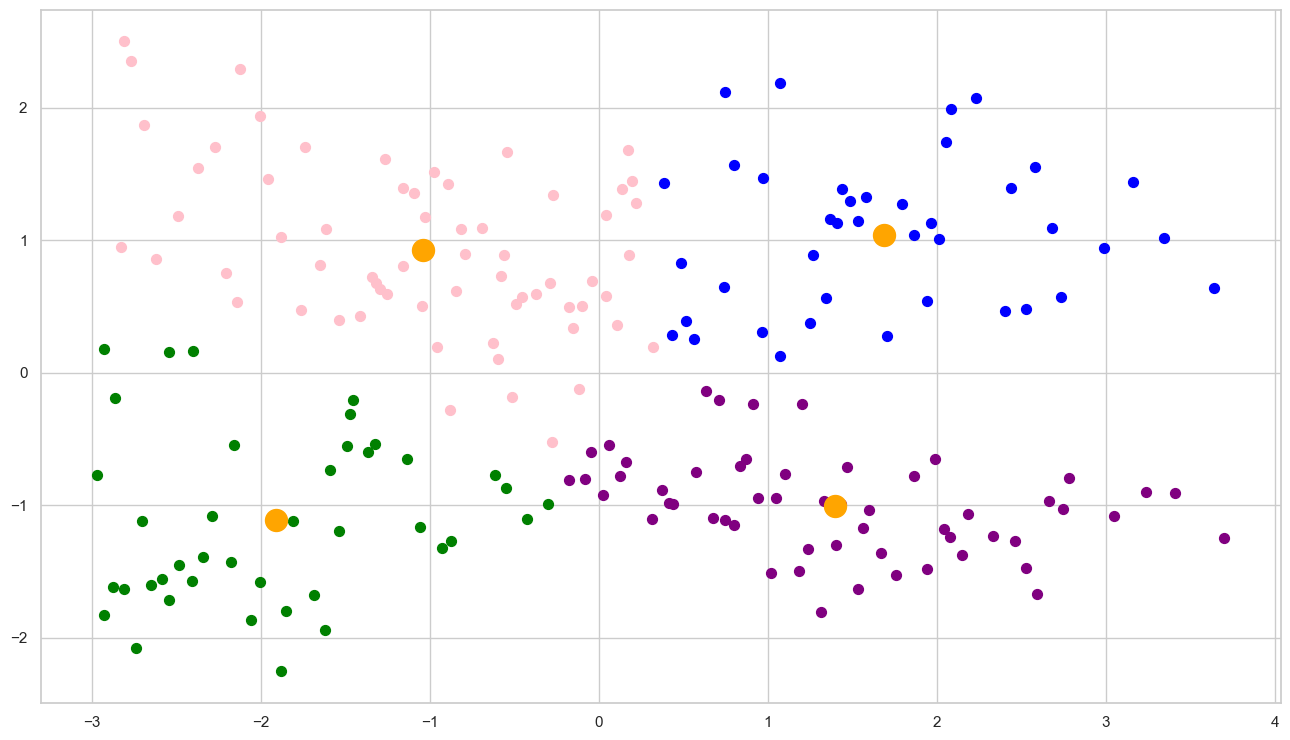

In [35]:
# With 4 clusters
kmeans = KMeans(n_clusters = 4, init ='k-means++', random_state=42,max_iter=300,n_init=10)
y_kmeans = kmeans.fit_predict(X_pca)
plt.figure(1 , figsize = (16 ,9))
plt.scatter(X_pca[y_kmeans == 0, 0], X_pca[y_kmeans == 0, 1], s = 50, c = 'blue', label = 'Cluster1')
plt.scatter(X_pca[y_kmeans == 1, 0], X_pca[y_kmeans == 1, 1], s = 50, c = 'green', label = 'Cluster2')
plt.scatter(X_pca[y_kmeans == 2, 0], X_pca[y_kmeans == 2, 1], s = 50, c = 'pink', label = 'Cluster3')
plt.scatter(X_pca[y_kmeans == 3, 0], X_pca[y_kmeans == 3, 1], s = 50, c = 'purple', label = 'Cluster4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 250, c = 'orange', label = 'Centroids')

plt.show()

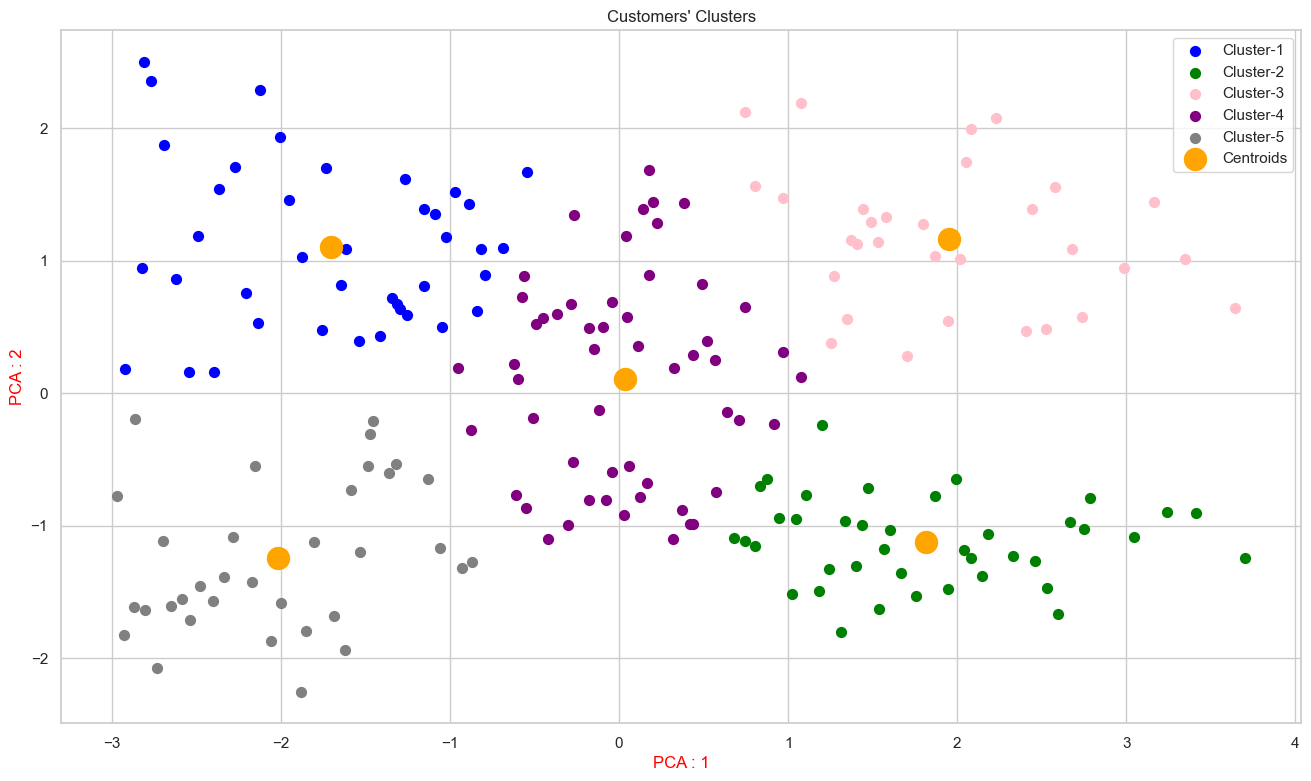

In [36]:
# With 5 Clusters
kmeans = KMeans(n_clusters = 5, init ='k-means++', random_state=42,max_iter=300,n_init=10)
y_kmeans = kmeans.fit_predict(X_pca)
plt.figure(1 , figsize = (16 ,9))
plt.scatter(X_pca[y_kmeans == 0, 0], X_pca[y_kmeans == 0, 1], s = 50, c = 'blue', label = 'Cluster-1')
plt.scatter(X_pca[y_kmeans == 1, 0], X_pca[y_kmeans == 1, 1], s = 50, c = 'green', label = 'Cluster-2')
plt.scatter(X_pca[y_kmeans == 2, 0], X_pca[y_kmeans == 2, 1], s = 50, c = 'pink', label = 'Cluster-3')
plt.scatter(X_pca[y_kmeans == 3, 0], X_pca[y_kmeans == 3, 1], s = 50, c = 'purple', label = 'Cluster-4')
plt.scatter(X_pca[y_kmeans == 4, 0], X_pca[y_kmeans == 4, 1], s = 50, c = 'grey', label = 'Cluster-5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 250, c = 'orange', label = 'Centroids')
plt.title("Customers' Clusters")
plt.xlabel('PCA : 1', color='red')
plt.ylabel('PCA : 2', color='red')
plt.legend()

plt.show()

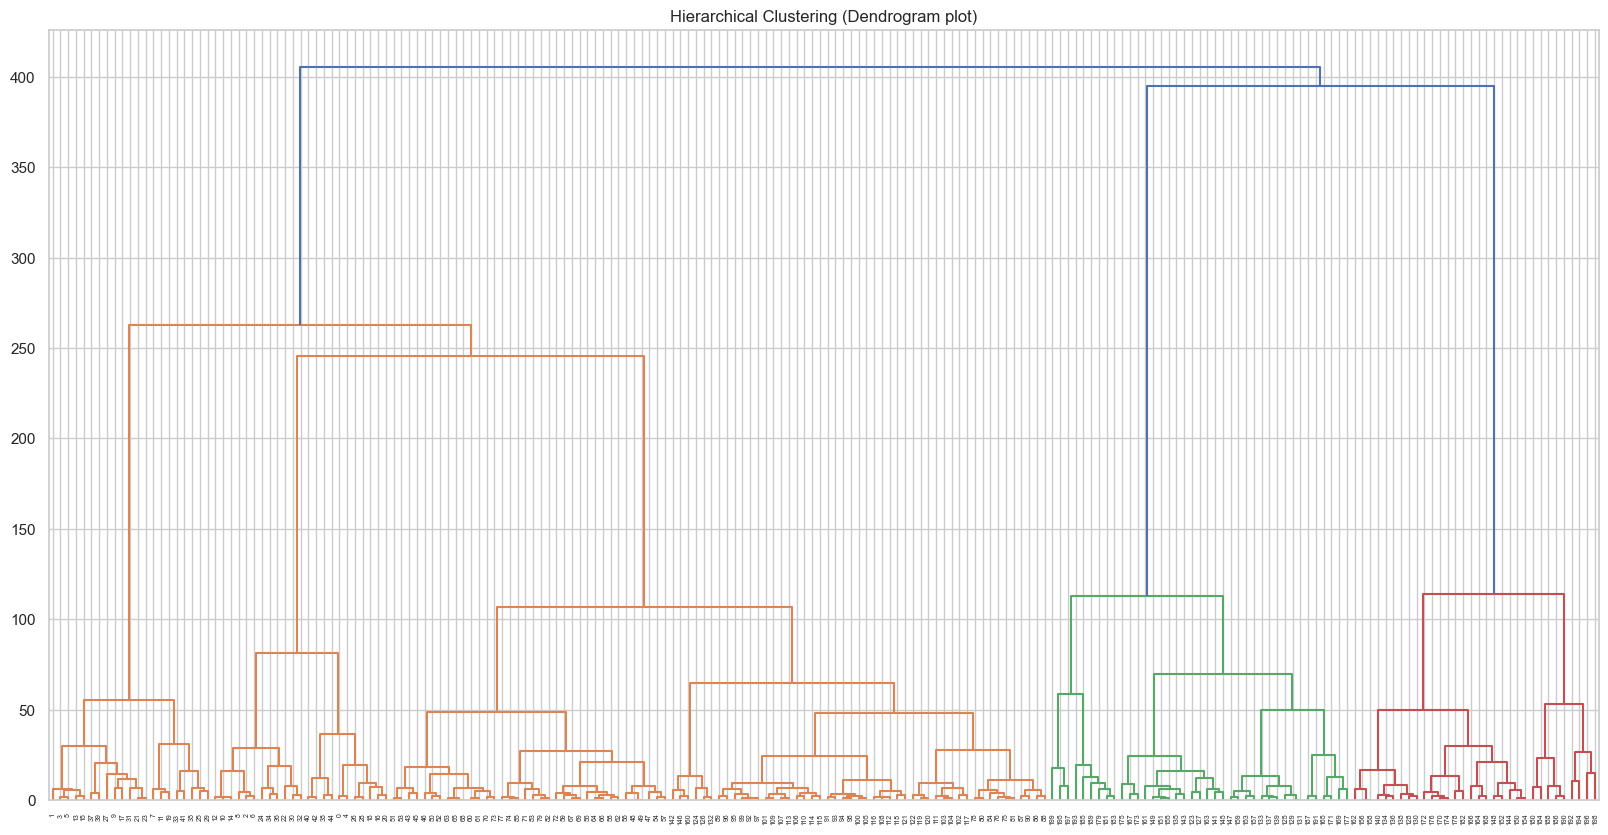

In [37]:
# Hierarchical Clustering ( Dendogram)
X=df.iloc[:, [3,4]].values
plt.figure(figsize=(20,10))
dendrogram=ch.dendrogram(ch.linkage(X,method = 'ward'))
plt.title('Hierarchical Clustering (Dendrogram plot)')

plt.show()

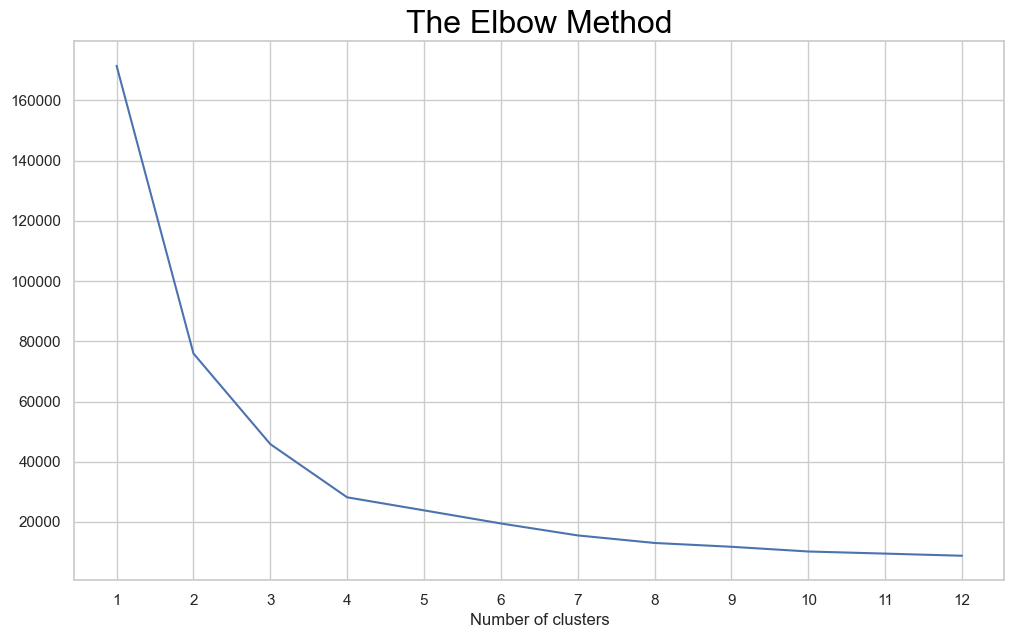

In [38]:
# Segmentation using Age and Spending Score
df_one = df[['Age','Spending Score (1-100)']].iloc[:,:].values
l2=[]
for i in range(1,13):
    kas = (KMeans(n_clusters = i ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 42 ) )
    kas.fit(df_one)
    l2.append(kas.inertia_)
#Optimum Clusters
plt.figure(figsize=(12,7))
plt.plot(range(1, 13), l2)
plt.title('The Elbow Method', color='black',fontsize='23')
plt.xlabel('Number of clusters')
plt.xticks(np.arange(1,13))
plt.show()

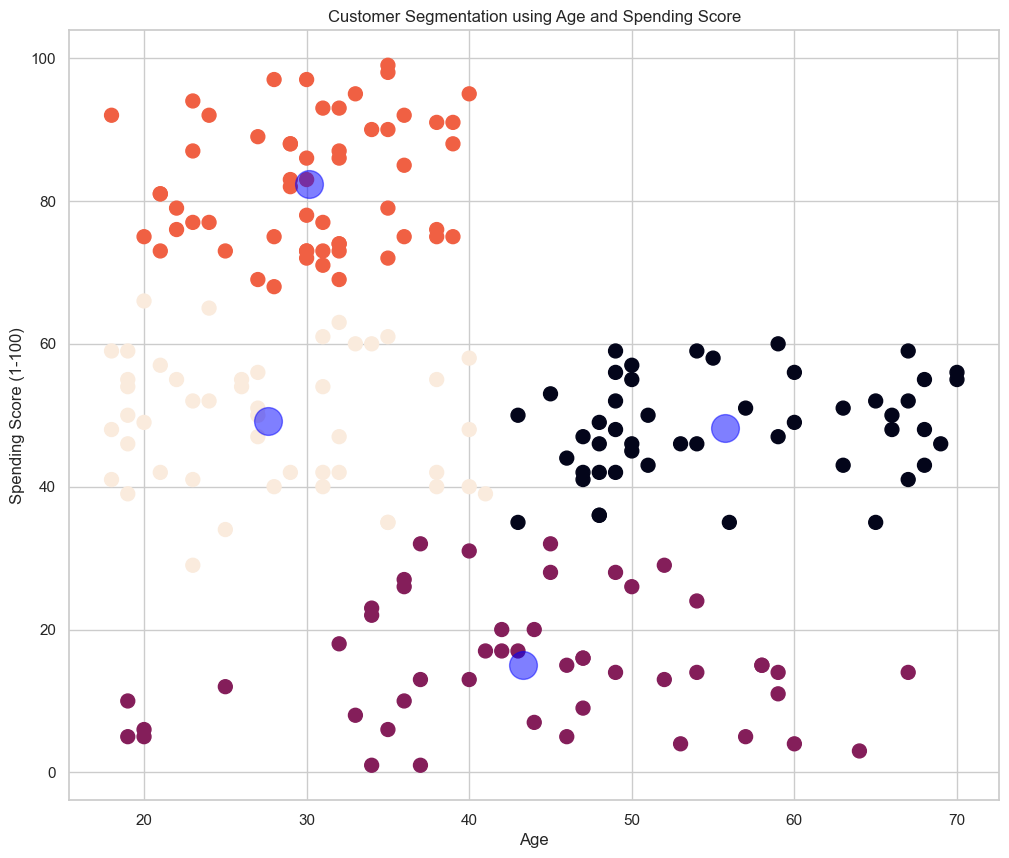

In [39]:
a = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                         random_state= 42 ) )
a.fit(df_one)
l = a.labels_
cn = a.cluster_centers_
# plot
plt.figure(figsize=(12,10))
plt.scatter( x = 'Age' ,y = 'Spending Score (1-100)' , data = df , c = l , 
            s = 100 )
plt.scatter(x = cn[: , 0] , y =  cn[: , 1] , s = 400 , c = 'blue' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Age')
plt.title('Customer Segmentation using Age and Spending Score')

plt.show()

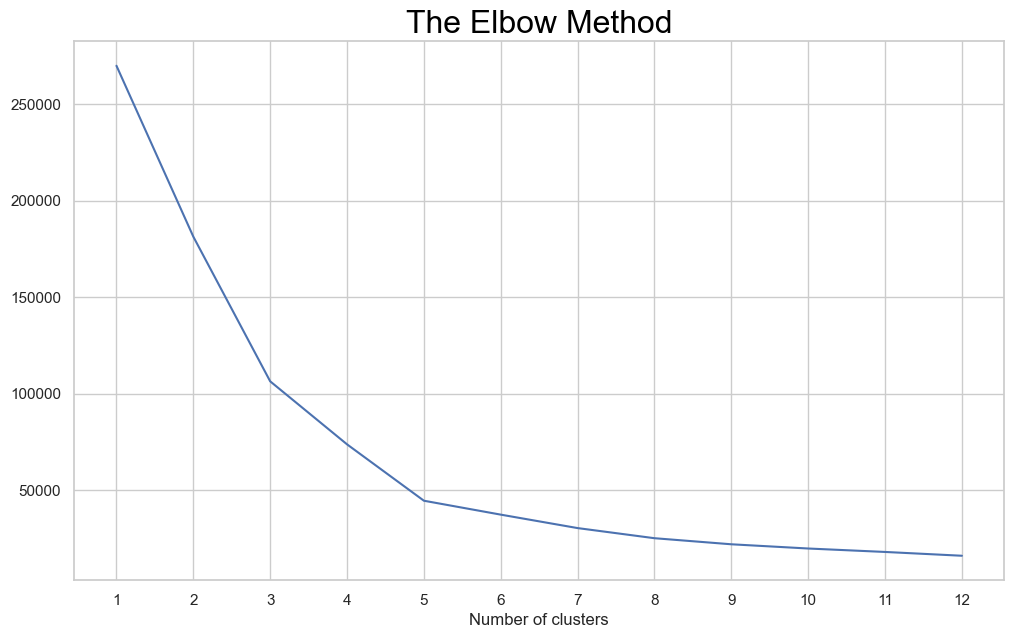

In [40]:
# Segmentation using Annual Income and Spending Score
df_two = df[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values
l3 = []
for i in range(1 , 13):
    kis = (KMeans(n_clusters = i ,init='k-means++', n_init = 10 ,max_iter=300, 
                          random_state= 42) )
    kis.fit(df_two)
    l3.append(kis.inertia_)
plt.figure(figsize=(12,7))
plt.plot(range(1, 13), l3)
plt.title('The Elbow Method', color='black',fontsize='23')
plt.xlabel('Number of clusters')
plt.xticks(np.arange(1,13))

plt.show()

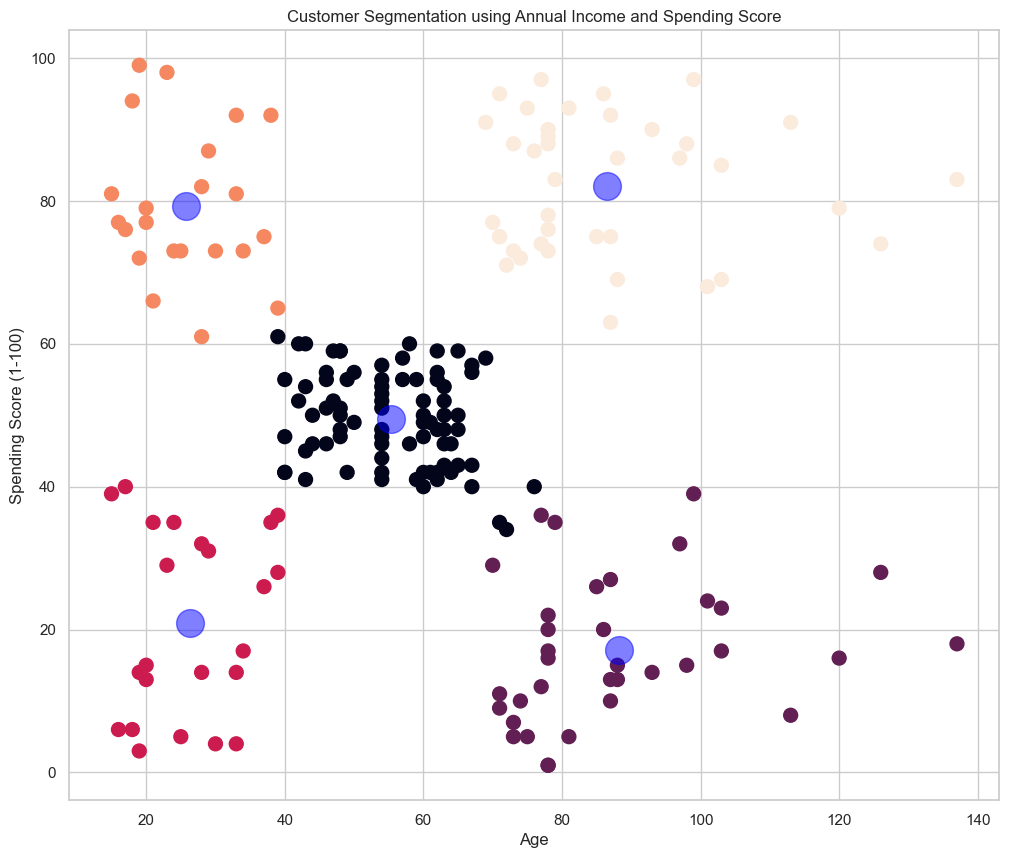

In [41]:
asi = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300, 
                         random_state= 42 ) )
asi.fit(df_two)
l_one = asi.labels_
cn_one = asi.cluster_centers_
# plot
plt.figure(figsize=(12,10))
plt.scatter( x = 'Annual Income (k$)' ,y = 'Spending Score (1-100)' , data = df , c = l_one , 
            s = 100 )
plt.scatter(x = cn_one[: , 0] , y =  cn_one[: , 1] , s = 400 , c = 'blue' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Age')
plt.title('Customer Segmentation using Annual Income and Spending Score')

plt.show()

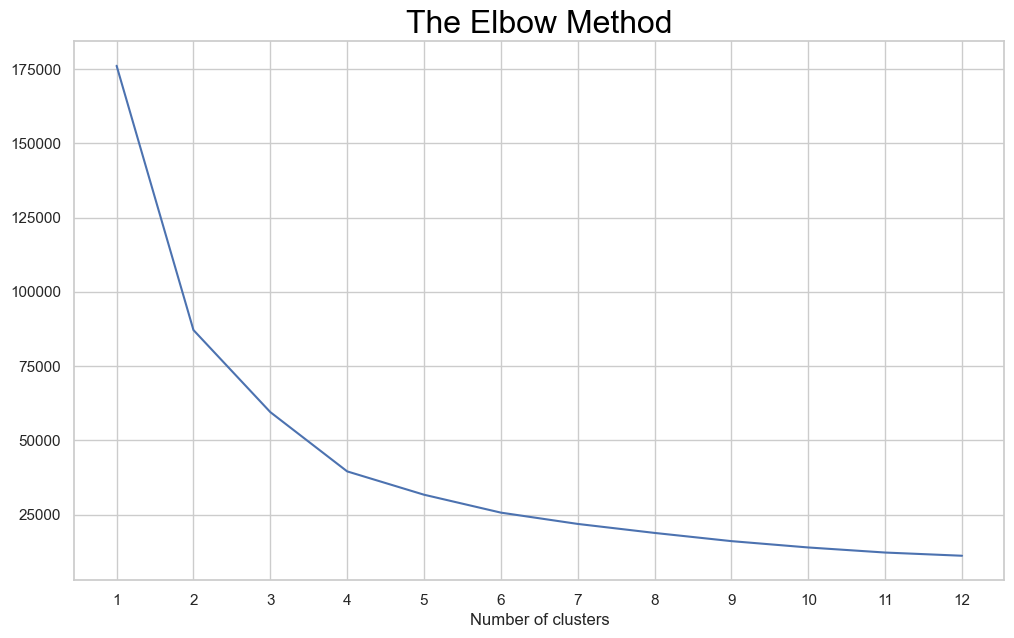

In [42]:
# Customer Segmentation using Age and Annual Income
df_three = df[['Age','Annual Income (k$)' ]].iloc[: , :].values
l4 = []
for i in range(1 , 13):
    kaa = (KMeans(n_clusters = i ,init='k-means++', n_init = 10 ,max_iter=300, 
                          random_state= 42) )
    kaa.fit(df_three)
    l4.append(kaa.inertia_)
# Plot 
plt.figure(figsize=(12,7))
plt.plot(range(1, 13), l4)
plt.title('The Elbow Method', color='black',fontsize='23')
plt.xlabel('Number of clusters')
plt.xticks(np.arange(1,13))

plt.show()

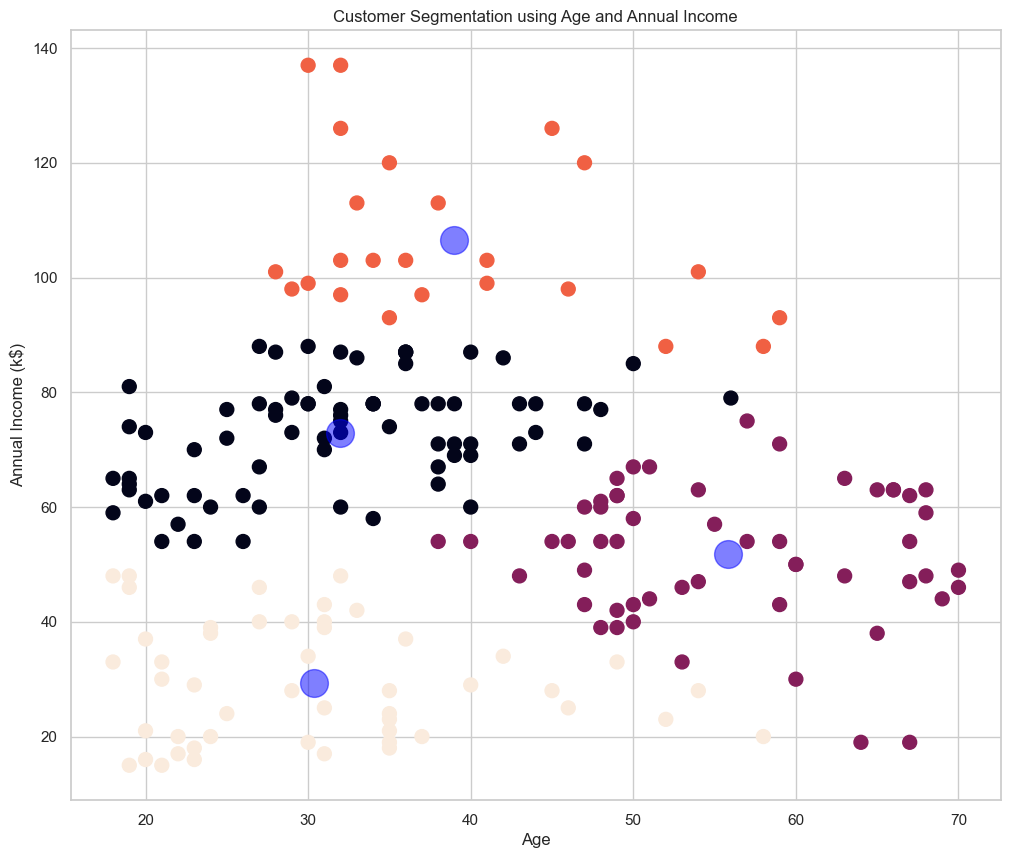

In [43]:
aa = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                         random_state= 42 ) )
aa.fit(df_three)
l_two = aa.labels_
cn_two = aa.cluster_centers_
# plot
plt.figure(figsize=(12,10))
plt.scatter( x = 'Age' ,y = 'Annual Income (k$)' , data = df , c = l_two , 
            s = 100 )
plt.scatter(x = cn_two[: , 0] , y =  cn_two[: , 1] , s = 400 , c = 'blue' , alpha = 0.5)
plt.ylabel('Annual Income (k$)') , plt.xlabel('Age')
plt.title('Customer Segmentation using Age and Annual Income')

plt.show()